In [2]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Nets_original  import GetNeuralNetworkModel
from Stats import WeightQuantization, ActivationStats, CheckAccuracyAndLoss, QuantizationEffect, GetReadAndWrites
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py


print('t0_tmp',t0_tmp)

NameError: name 't0_tmp' is not defined

In [70]:
datetime.now()

datetime.datetime(2023, 10, 24, 13, 5, 36, 698745)

In [74]:
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

fin = time.time()
print(fin-inicio) # 1.0005340576171875

1.0180315971374512


In [3]:




datos  = pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar')
tabla= datos.set_index("Voltajes")

#ECC_w  = pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar', usecols=["ECC_weights" ])
#ECC_A  = pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar', usecols=["ECC_Actvs" ])
#Baseline_w=pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar', usecols=["B_Weights"])
#Baseline_A=pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar', usecols=["B_Actvs"])




<Figure size 2000x500 with 0 Axes>

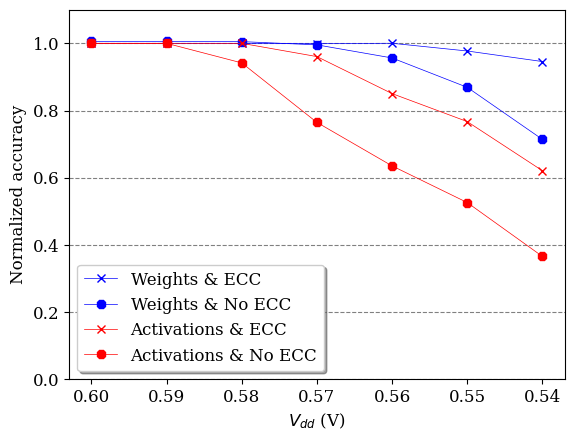

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [4]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#from datetime import datetime
import time
mpl.rcParams['font.family']='serif'



l='0.5'
marksize=6

x=datos["Voltajes"]

fig = plt.figure(figsize=(20,5), dpi=100)
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots()
#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


plt.xlabel("$V_{dd}$ (V)", fontsize=12,  fontfamily="serif")
plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")
plt.xticks( fontsize= 12, fontfamily="serif" )
plt.yticks( fontsize= 12, fontfamily="serif" )
ax1.set_ylim(0,1.1)
#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()



ax1.plot(tabla["Weights & ECC"], label='Weights & ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["Weights & No ECC"], label='Weights & No ECC', color='b', ls='-', lw=l, marker='8', markersize=marksize)
ax1.plot(tabla["Activations & ECC"], label='Activations & ECC', color="r", ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["Activations & No ECC"], label='Activations & No ECC', color="r", ls='-', lw=l, marker='8', markersize=marksize)
ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
ax1.legend(fontsize=12, shadow = True)



#plt.savefig('comparat_weights_acts_ecc_No_ecc_n.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show



In [4]:
datos_  = pd.read_excel('Analizando_fichero_detalle/Analize_weights/codigo_optimizado/Entregar_Resm_Acc_Base_ECC_all_vol_weights_and activs.xlsx',sheet_name='graficar2')
tabla_= datos_.set_index("Voltajes")

In [5]:
datos_

,Voltajes,Weights & No ECC,Activations & No ECC,Weights & ECC,Activations & ECC
0,0.54,0.599730,0.324499,0.788398,0.528563
1,0.55,0.725302,0.452715,0.825466,0.645479
2,0.56,0.796952,0.539989,0.900058,0.712090
3,0.57,0.826813,0.643524,0.914528,0.844462
4,0.58,0.918215,0.942551,1.001641,0.999558
5,0.59,1.001444,0.999558,0.997474,0.999558
6,0.60,1.004049,0.999558,0.999558,0.999558


<Figure size 2000x500 with 0 Axes>

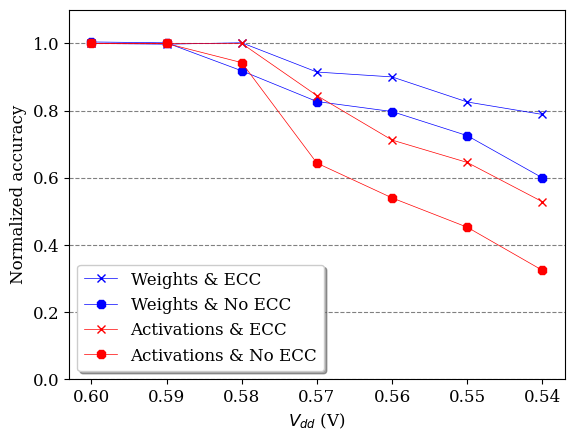

<Figure size 640x480 with 0 Axes>

In [7]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#from datetime import datetime
import time
mpl.rcParams['font.family']='serif'



l='0.5'
marksize=6

x=datos_["Voltajes"]

fig = plt.figure(figsize=(20,5), dpi=100)
plt.rcParams.update({'font.size': 15})
fig1, ax2 = plt.subplots()
x_values = range(len(x))


plt.xlabel("$V_{dd}$ (V)", fontsize=12,  fontfamily="serif")
plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")
plt.xticks( fontsize= 12, fontfamily="serif" )
plt.yticks( fontsize= 12, fontfamily="serif" )
ax2.set_ylim(0,1.1)

ax2.invert_xaxis()



ax2.plot(tabla_["Weights & ECC"], label='Weights & ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(tabla_["Weights & No ECC"], label='Weights & No ECC', color='b', ls='-', lw=l, marker='8', markersize=marksize)
ax2.plot(tabla_["Activations & ECC"], label='Activations & ECC', color="r", ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(tabla_["Activations & No ECC"], label='Activations & No ECC', color="r", ls='-', lw=l, marker='8', markersize=marksize)
ax2.grid(axis='y', color = 'gray', linestyle = 'dashed')
ax2.legend(fontsize=12, shadow = True)


plt.savefig('comparat_weights_acts_all_net.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()



